In [173]:
import pandas as pd
import json

In [215]:
filename = ""
data = json.load(open(filename))
df = pd.DataFrame()

In [223]:
dates = []
for element in data["series"]:
    for i in element["values"]:
        dates.append(i[0])
dates = list(set(dates))


In [224]:
df = pd.DataFrame()
df["date"] = dates
df = df.set_index("date")
df.index =  pd.to_datetime(df.index.sort_values(),infer_datetime_format=True)

In [226]:
for element in data["series"]:
    colname=element["tags"]["username"]
    for i in element["values"]:
        try:
            df.loc[i[0], colname] = int(i[1])
        except Exception as e: 
            print(e)        
df = df.fillna(0)

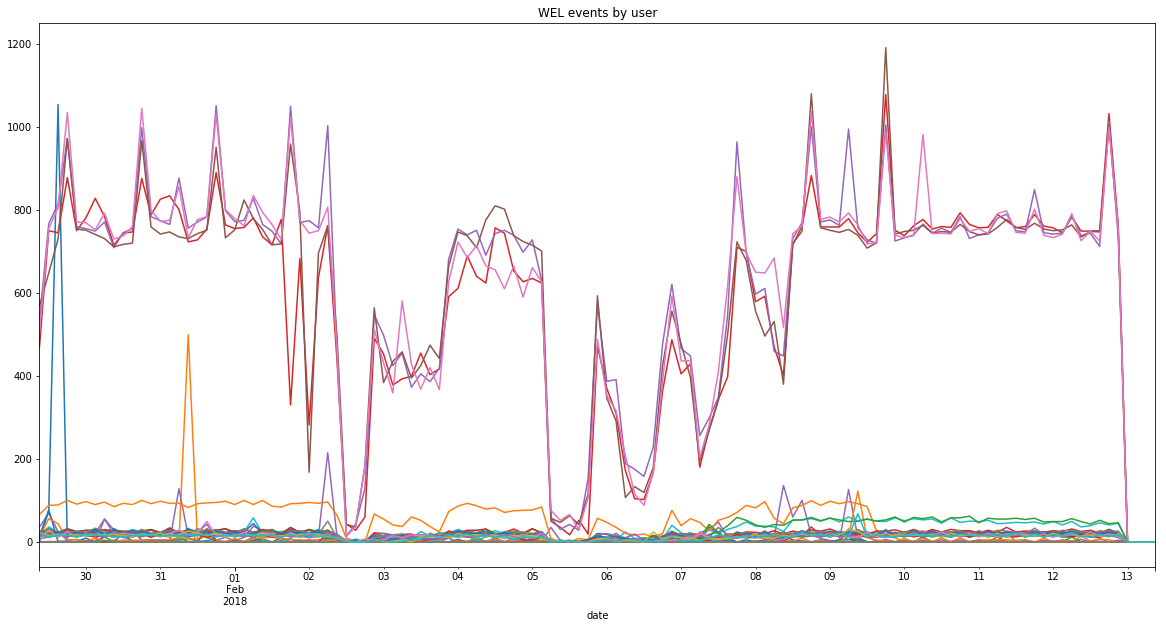

In [235]:
import matplotlib.pyplot as plt
df.plot(legend = False, figsize=(20,10), title='WEL events by user')
plt.show()

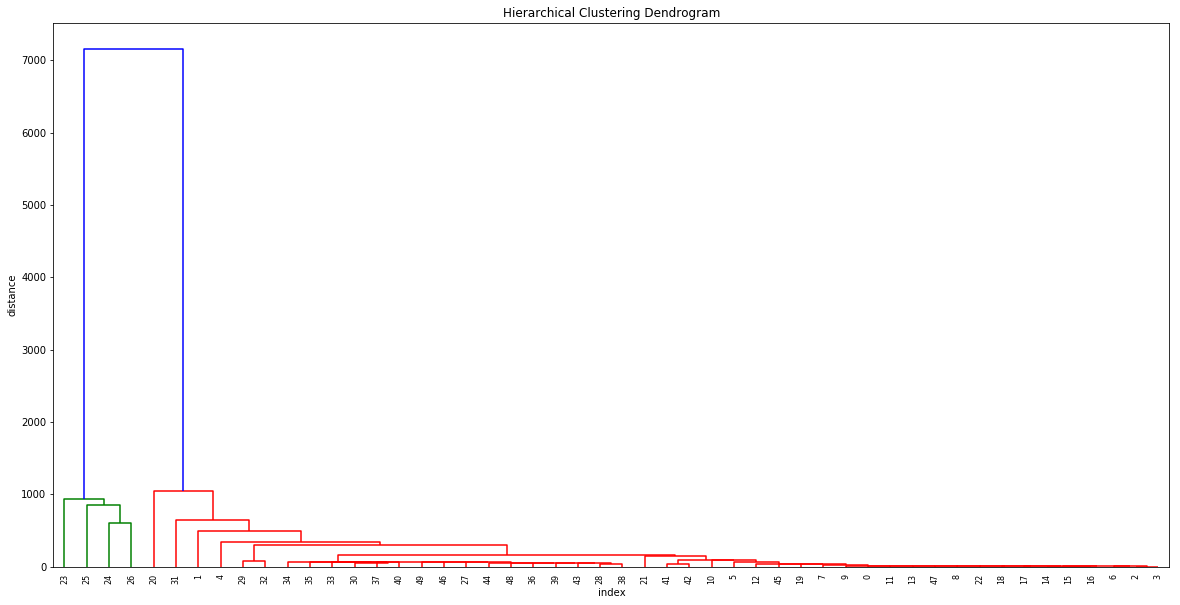

In [245]:
import scipy.cluster.hierarchy as hac
Z = hac.linkage(df.T, method='centroid', metric='euclidean')
plt.figure(figsize=(20, 10))

# plt.yscale('symlog', linthreshy=0.9)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90., 
    leaf_font_size=8.,
)
plt.show()


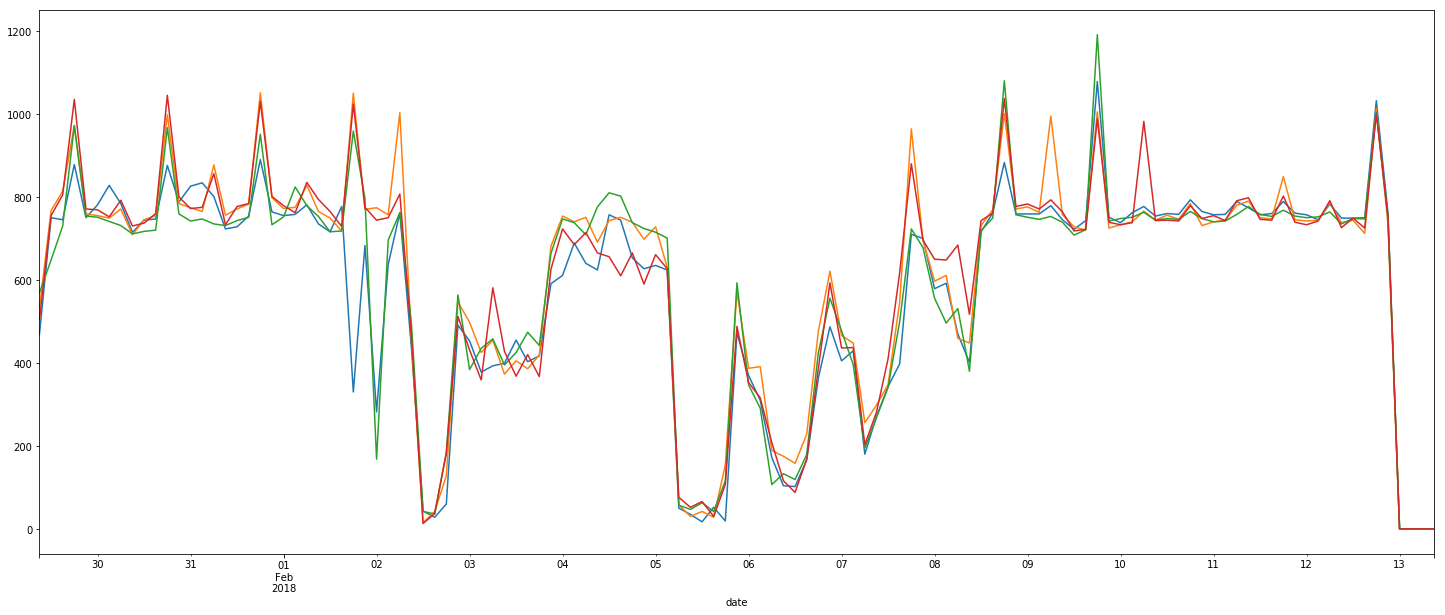

In [237]:
df2 = df.loc[:, df.sum(axis = 0)>=17000]
df2.plot(legend = False, figsize=(25,10))
plt.show()

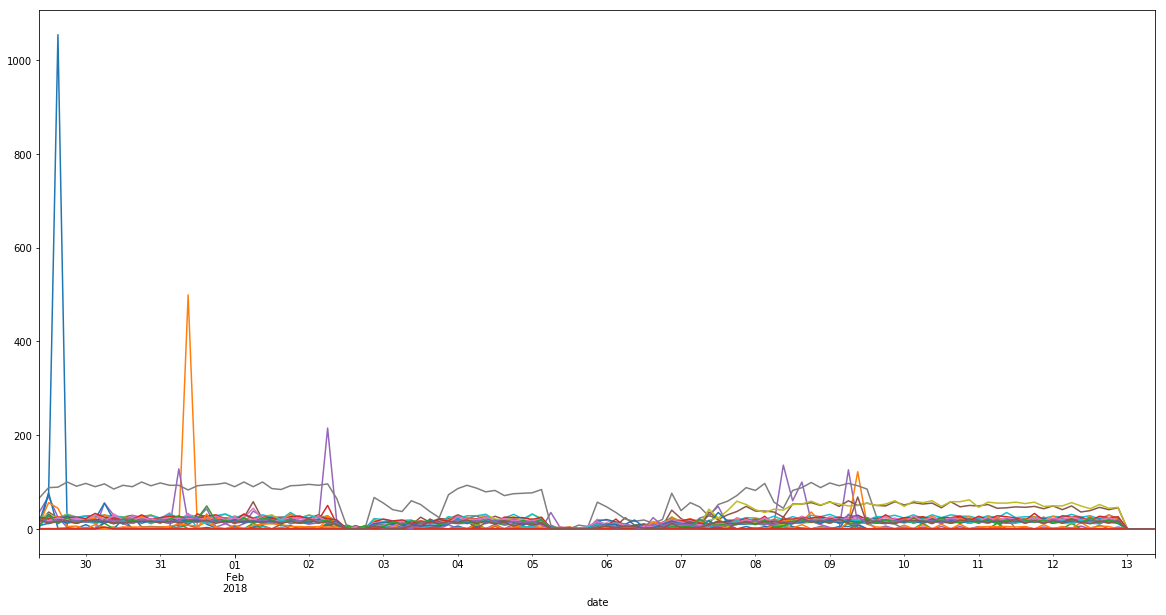

In [238]:
df2 = df.loc[:, df.sum(axis = 0)<=17000]
df2.plot(legend = False, figsize=(20,10));
plt.show()

In [243]:
def plot_specific_range(day, hour, df):
    daily_df = pd.DataFrame()
    daily_df = df[(df.index.hour== hour) & (df.index.day== day)]
    Z = hac.linkage(daily_df.T, method='centroid', metric='euclidean')
    plt.figure(figsize=(20, 10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('index')
    plt.ylabel('distance')
    hac.dendrogram(
            Z,
            leaf_rotation=90., 
            leaf_font_size=8.,
        )
    plt.show()

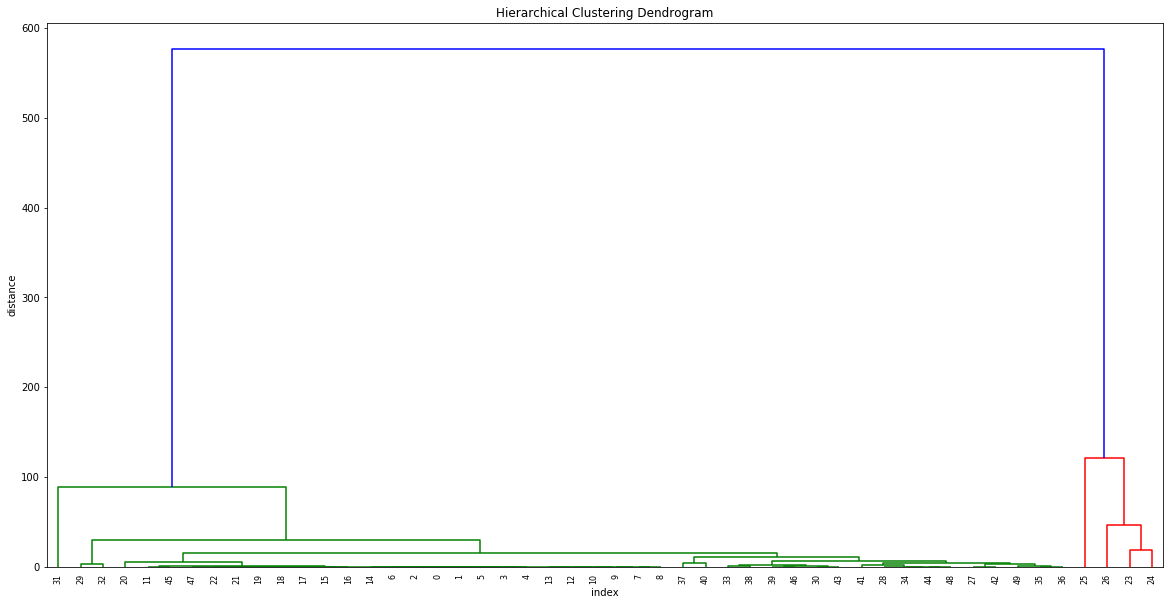

In [242]:
day = 8
hour = 3
plot_specific_range(day, hour, df)


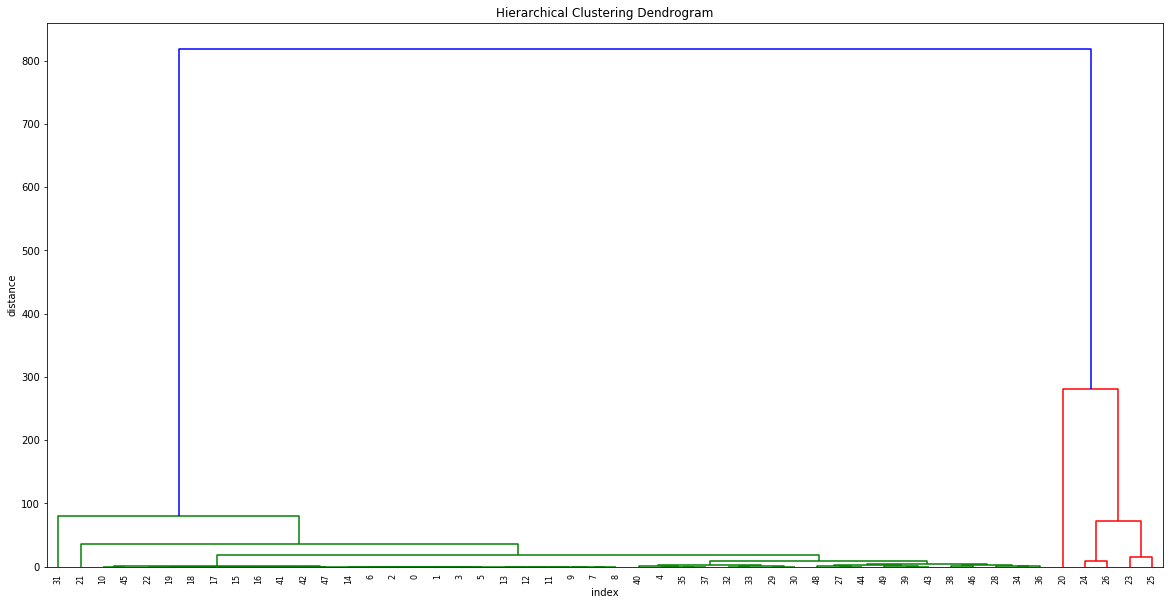

In [244]:
day = 29
hour = 15
plot_specific_range(day, hour, df)
